<a href="https://colab.research.google.com/github/zxc741xb/Chronic_Kidney_Disease/blob/main/CKD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/kidney_disease.csv')
df = df.drop(['id'], axis=1)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wc      294 non-null    float64
 17  rc      269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [ ]:
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wc       106
rc       131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

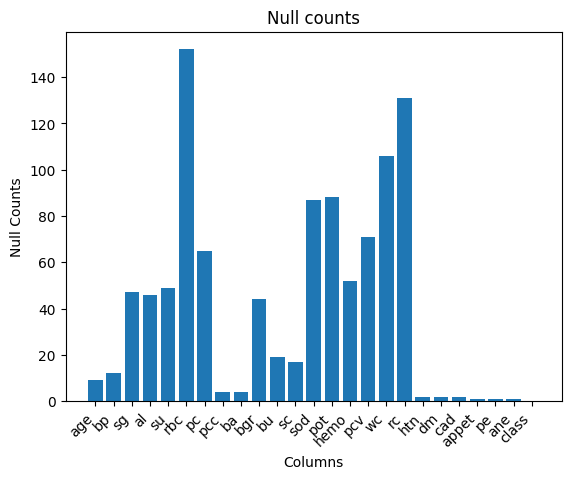

In [ ]:
null_counts = df.isnull().sum()
fig, ax = plt.subplots()
ax.bar(null_counts.index, null_counts.values)
ax.set_title('Null counts')
ax.set_xlabel('Columns')
ax.set_ylabel('Null Counts')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
columnsName = df.columns
for i in range (0,25):
    print(columnsName[i],df[columnsName[i]].unique())

age [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
bp [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
sg [1.02  1.01  1.005 1.015   nan 1.025]
al [ 1.  4.  2.  3.  0. nan  5.]
su [ 0.  3.  4.  1. nan  2.  5.]
rbc [nan 'normal' 'abnormal']
pc ['normal' 'abnormal' nan]
pcc ['notpresent' 'present' nan]
ba ['notpresent' 'present' nan]
bgr [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172.
 101. 298. 153.  88. 226. 143. 1

In [ ]:
# Dealing with abnormal values
df=df.replace({'ckd\t':"ckd","\tyes":"yes","\tno":"no", " yes":"yes"})
for i in range (0,25):
    print(columnsName[i],df[columnsName[i]].unique())

age [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
bp [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
sg [1.02  1.01  1.005 1.015   nan 1.025]
al [ 1.  4.  2.  3.  0. nan  5.]
su [ 0.  3.  4.  1. nan  2.  5.]
rbc [nan 'normal' 'abnormal']
pc ['normal' 'abnormal' nan]
pcc ['notpresent' 'present' nan]
ba ['notpresent' 'present' nan]
bgr [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172.
 101. 298. 153.  88. 226. 143. 1

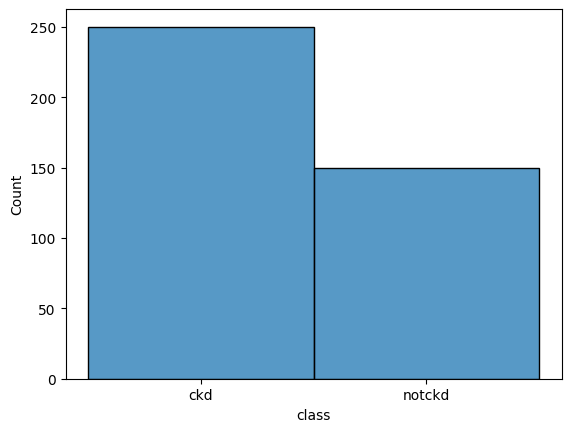

In [ ]:
sns.histplot(df['class'])
plt.show()

Text(0.5, 1.0, 'Bacteria')

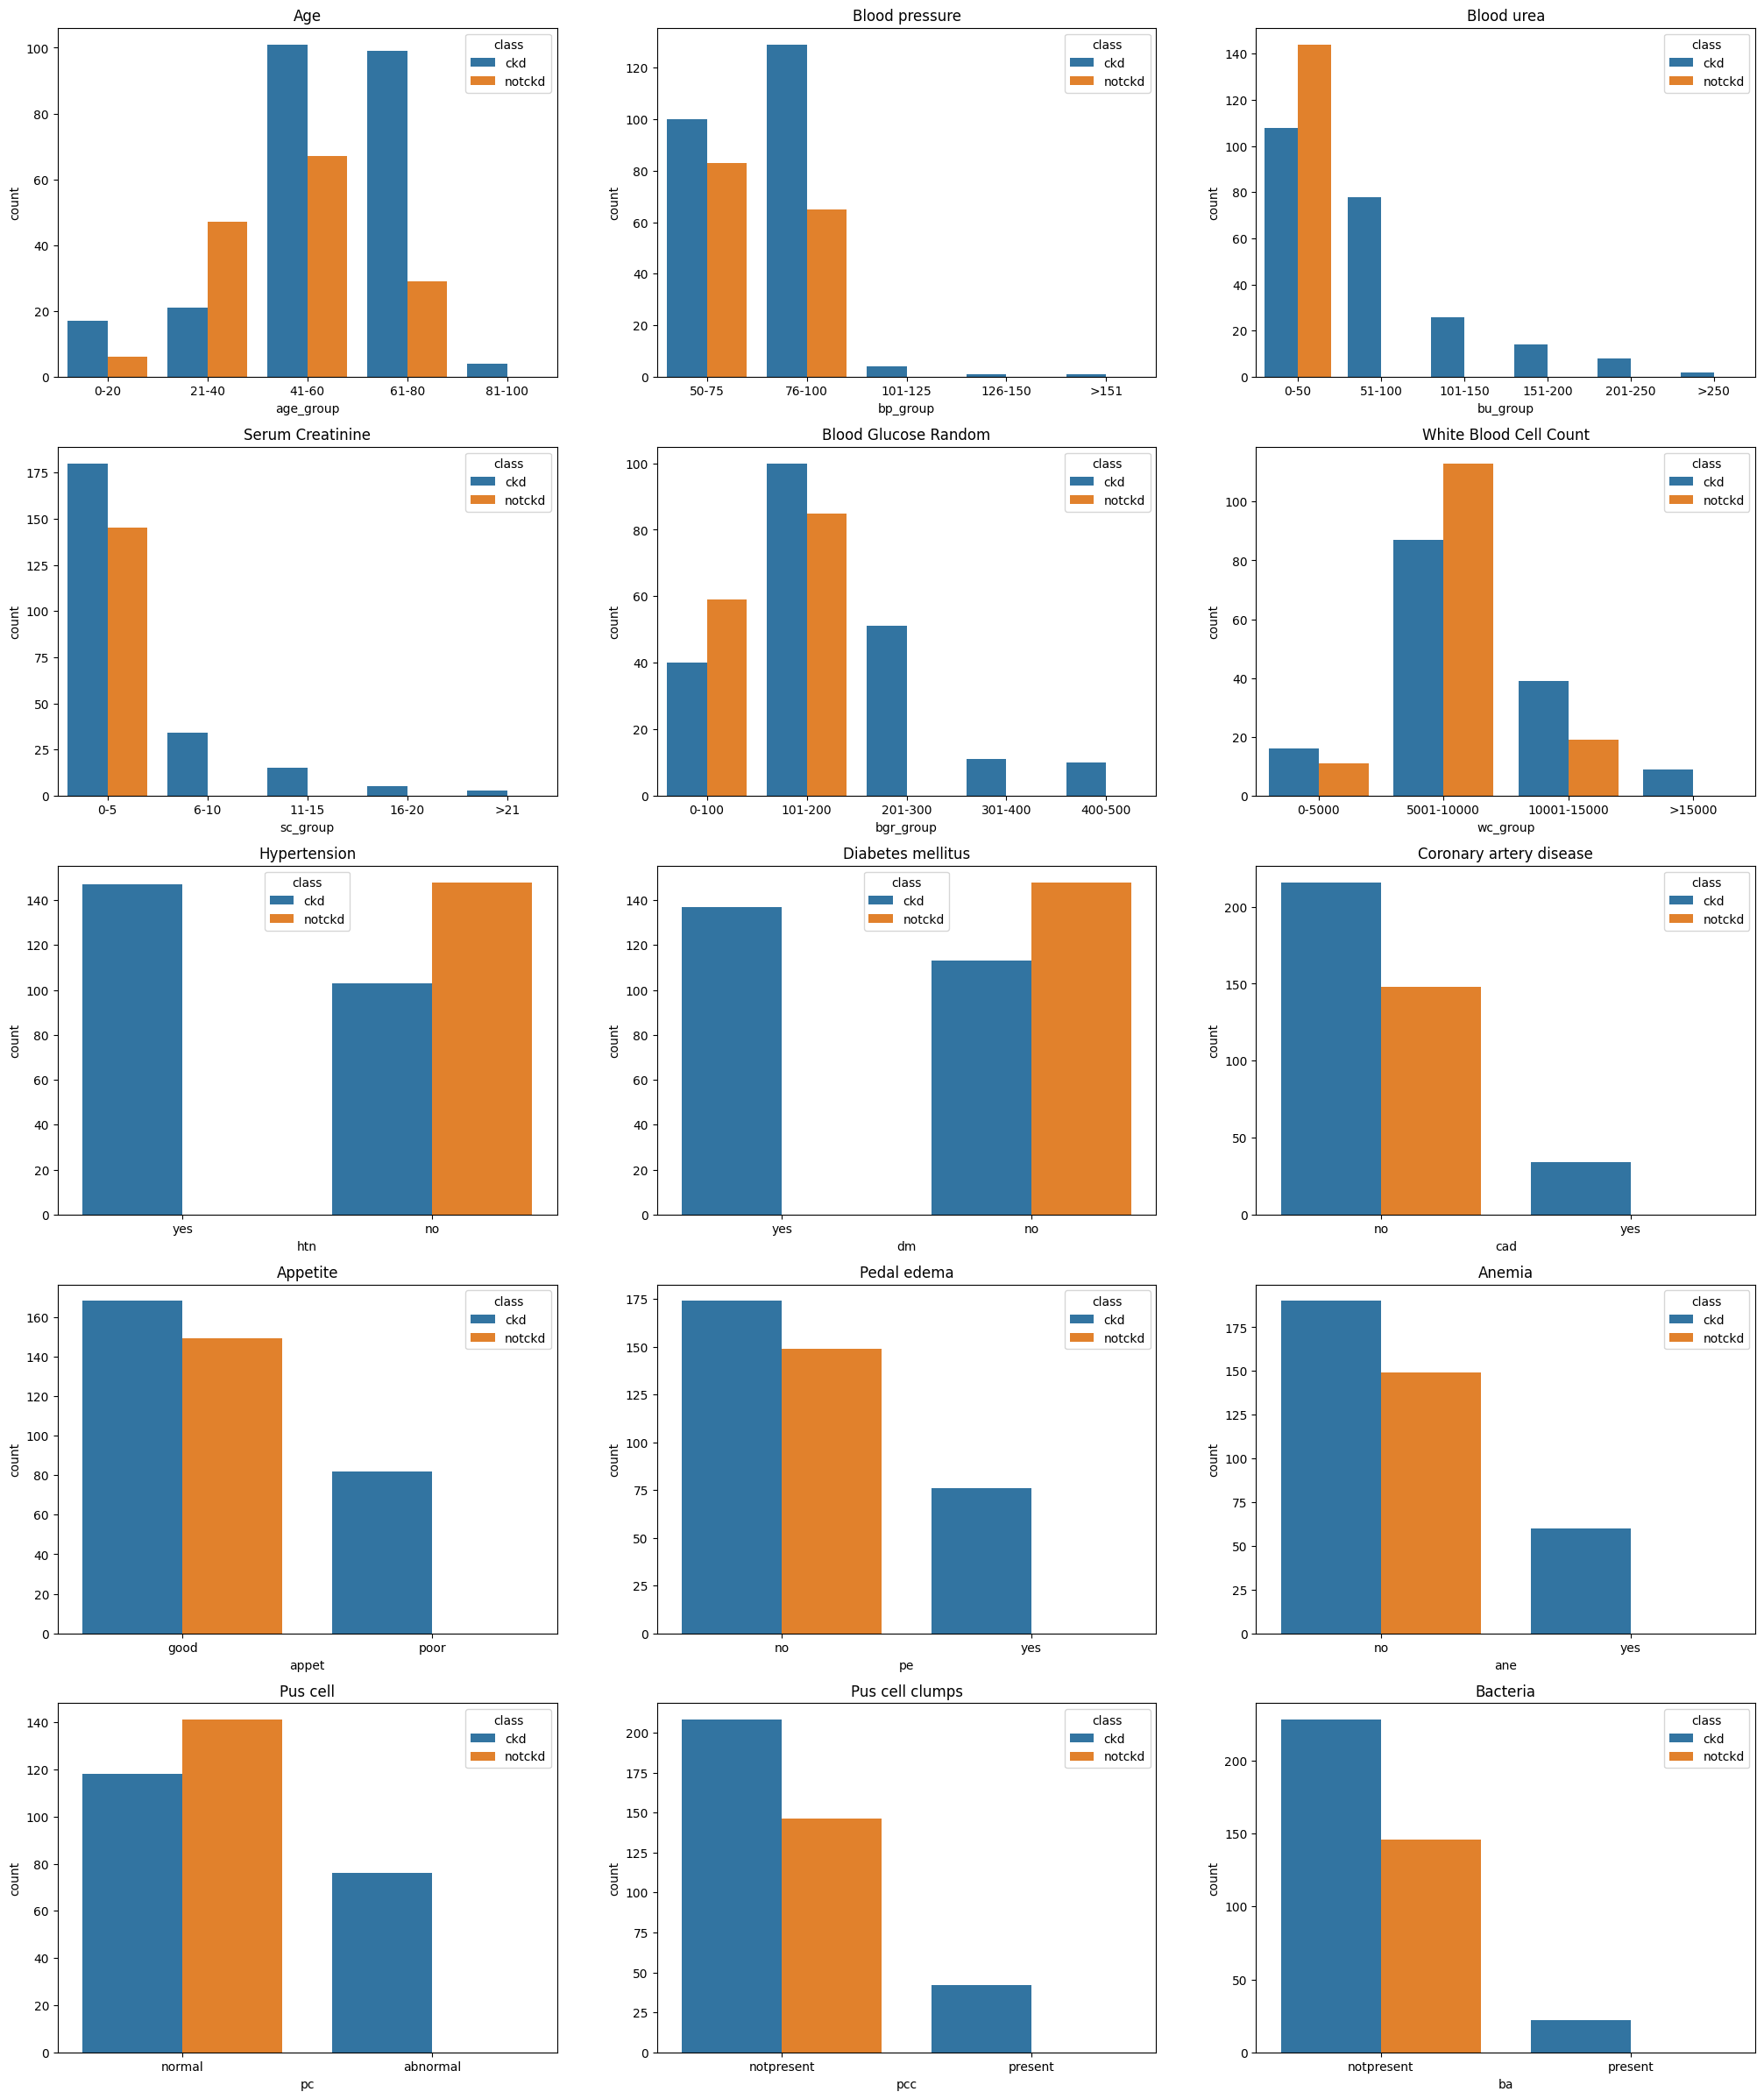

In [ ]:
fig, axes = plt.subplots(5, 3, figsize=(25, 30))
bins = [0, 20, 40, 60 ,80 ,100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
sns.countplot(ax=axes[0,0], x='age_group', hue='class', data=df)
df = df.drop(['age_group'], axis=1)

bins = [50, 75, 100, 125 ,150 , 200]
labels = ['50-75', '76-100', '101-125', '126-150', '>151']
df['bp_group'] = pd.cut(df['bp'], bins=bins, labels=labels)
sns.countplot(ax=axes[0,1], x='bp_group', hue='class', data=df)
df = df.drop(['bp_group'], axis=1)

bins = [0, 50, 100, 150, 200 ,250 , 350]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '>250']
df['bu_group'] = pd.cut(df['bu'], bins=bins, labels=labels)
sns.countplot(ax=axes[0,2], x='bu_group', hue='class', data=df)
df = df.drop(['bu_group'], axis=1)

bins = [0, 5, 10, 15, 20, 50]
labels = ['0-5', '6-10', '11-15', '16-20', '>21']
df['sc_group'] = pd.cut(df['sc'], bins=bins, labels=labels)
sns.countplot(ax=axes[1,0], x='sc_group', hue='class', data=df)
df = df.drop(['sc_group'], axis=1)

bins = [0, 100, 200, 300, 400, 500]
labels = ['0-100', '101-200', '201-300', '301-400', '400-500']
df['bgr_group'] = pd.cut(df['bgr'], bins=bins, labels=labels)
sns.countplot(ax=axes[1,1], x='bgr_group', hue='class', data=df)
df = df.drop(['bgr_group'], axis=1)

bins = [0, 5000, 10000, 15000, 30000]
labels = ['0-5000', '5001-10000', '10001-15000', '>15000']
df['wc_group'] = pd.cut(df['wc'], bins=bins, labels=labels)
sns.countplot(ax=axes[1,2], x='wc_group', hue='class', data=df)
df = df.drop(['wc_group'], axis=1)

sns.countplot(ax=axes[2,0], x='htn', hue='class', data=df)
sns.countplot(ax=axes[2,1], x='dm', hue='class', data=df)
sns.countplot(ax=axes[2,2], x='cad', hue='class', data=df)
sns.countplot(ax=axes[3,0], x='appet', hue='class', data=df)
sns.countplot(ax=axes[3,1], x='pe', hue='class', data=df)
sns.countplot(ax=axes[3,2], x='ane', hue='class', data=df)
sns.countplot(ax=axes[4,0], x='pc', hue='class', data=df)
sns.countplot(ax=axes[4,1], x='pcc', hue='class', data=df)
sns.countplot(ax=axes[4,2], x='ba', hue='class', data=df)

axes[0,0].set_title('Age')
axes[0,1].set_title('Blood pressure')
axes[0,2].set_title('Blood urea')
axes[1,0].set_title('Serum Creatinine')
axes[1,1].set_title('Blood Glucose Random')
axes[1,2].set_title('White Blood Cell Count')
axes[2,0].set_title('Hypertension')
axes[2,1].set_title('Diabetes mellitus')
axes[2,2].set_title('Coronary artery disease')
axes[3,0].set_title('Appetite')
axes[3,1].set_title('Pedal edema')
axes[3,2].set_title('Anemia')
axes[4,0].set_title('Pus cell')
axes[4,1].set_title('Pus cell clumps')
axes[4,2].set_title('Bacteria')

In [ ]:
# Categorical to numerical
df=df.replace({'yes':1, 'no':0, 'present':1, 'notpresent':0, 'normal':0,'abnormal':1, "good":1,"poor":0, "ckd":1, "notckd":0})

In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [ ]:
# Deal with missing value by KNN
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=2)
df = imputer.fit_transform(df)
df = pd.DataFrame(df,columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'])

In [ ]:
# Deal with missing value by iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
imputer=IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=100))
df = imputer.fit_transform(df)
df = pd.DataFrame(df,columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'])

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
df.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0.83,0.00,0.0,0.0,121.00,...,44.0,7800.0,5.200,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,0.36,0.00,0.0,0.0,140.25,...,38.0,6000.0,4.690,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.00,0.00,0.0,0.0,423.00,...,31.0,7500.0,3.711,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.00,1.00,1.0,0.0,117.00,...,32.0,6700.0,3.900,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.00,0.00,0.0,0.0,106.00,...,35.0,7300.0,4.600,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,60.0,90.0,1.015,3.0,0.0,0.23,0.17,0.0,0.0,74.00,...,39.0,7800.0,4.400,1.0,1.0,0.0,1.0,1.0,0.0,1.0
6,68.0,70.0,1.010,0.0,0.0,0.68,0.00,0.0,0.0,100.00,...,36.0,7811.0,4.989,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,24.0,74.7,1.015,2.0,4.0,0.00,1.00,0.0,0.0,410.00,...,44.0,6900.0,5.000,0.0,1.0,0.0,1.0,1.0,0.0,1.0
8,52.0,100.0,1.015,3.0,0.0,0.00,1.00,1.0,0.0,138.00,...,33.0,9600.0,4.000,1.0,1.0,0.0,1.0,0.0,1.0,1.0
9,53.0,90.0,1.020,2.0,0.0,1.00,1.00,1.0,0.0,70.00,...,29.0,12100.0,3.700,1.0,1.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
df.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [ ]:
# rbc, pc ,appet..  must have binary values:
cname=['rbc','pc','pcc','ba','appet','htn','dm','cad','pe','ane']
for i in range(0,10):
  for j in range(0,400):
    if df[cname[i]][j]>=0.5:
      df[cname[i]][j]=1.0
    else:
      df[cname[i]][j]=0.0

In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,101.5,...,38.0,6000.0,5.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,3.2,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
# Data visualization
figure, axe = plt.subplots(4,3,figsize=(15, 20))
axe[0,0].hist(df['age'])
axe[0,0].set_xlabel('Age')
axe[0,1].hist(df['bp'])
axe[0,1].set_xlabel('Blood Pressure')
axe[0,2].hist(df['bu'])
axe[0,2].set_xlabel('Blood Urea')

axe[1,0].hist(df["sc"])
axe[1,0].set_xlabel("Serum Creatinine")
axe[1,1].hist(df["bgr"])
axe[1,1].set_xlabel("Blood Glucose Random")
axe[1,2].hist(df["sod"])
axe[1,2].set_xlabel("Sodium")

axe[2,0].hist(df["pot"], bins=40)
axe[2,0].set_xlabel("Potassium")
axe[2,1].hist(df["hemo"])
axe[2,1].set_xlabel("Hemoglobin")
axe[2,2].hist(df["pcv"])
axe[2,2].set_xlabel("Packed Cell Volume")

axe[3,0].hist(df["wc"])
axe[3,0].set_xlabel("White Blood Cell Count")
axe[3,1].hist(df["rc"])
axe[3,1].set_xlabel("Red Blood Cell Count")


<Axes: >

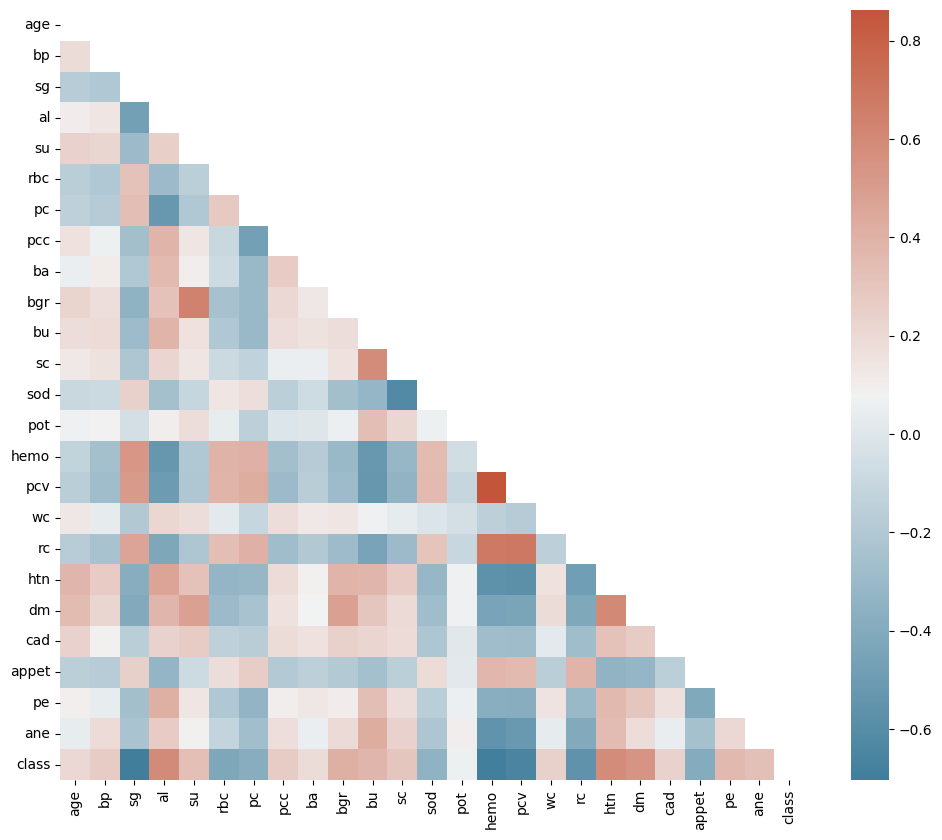

In [ ]:
corr = df.corr()
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask = mask, cmap=cmap)

In [ ]:
# Scale numerical columns
from sklearn.preprocessing import MinMaxScaler
numerical_cols = df.select_dtypes(include=['int', 'float']).columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df.head())

        age        bp    sg   al   su  rbc   pc  pcc   ba       bgr  ...  \
0  0.522727  0.230769  0.75  0.2  0.0  0.0  0.0  0.0  0.0  0.211538  ...   
1  0.056818  0.000000  0.75  0.8  0.0  1.0  0.0  0.0  0.0  0.169872  ...   
2  0.681818  0.230769  0.25  0.4  0.6  0.0  0.0  0.0  0.0  0.856838  ...   
3  0.522727  0.153846  0.00  0.8  0.0  0.0  1.0  1.0  0.0  0.202991  ...   
4  0.556818  0.230769  0.25  0.4  0.0  0.0  0.0  0.0  0.0  0.179487  ...   

        pcv        wc        rc  htn   dm  cad  appet   pe  ane  class  
0  0.777778  0.231405  0.525424  1.0  1.0  0.0    1.0  0.0  0.0    1.0  
1  0.644444  0.157025  0.576271  0.0  0.0  0.0    1.0  0.0  0.0    1.0  
2  0.488889  0.219008  0.186441  0.0  1.0  0.0    0.0  0.0  1.0    1.0  
3  0.511111  0.185950  0.305085  1.0  0.0  0.0    0.0  1.0  1.0    1.0  
4  0.577778  0.210744  0.423729  0.0  0.0  0.0    1.0  0.0  0.0    1.0  

[5 rows x 25 columns]


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['class'], axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(320, 24)
(80, 24)


## SVM

In [ ]:
# SVM
from sklearn.svm import SVC
clf = SVC(kernel='rbf', max_iter=5000).fit(X=X_train, y=y_train)
y_pred = clf.predict(X_test)
print("mean accuracy of training set:", clf.score(X=X_train, y=y_train))
print("mean accuracy of testing set:", clf.score(X=X_test, y=y_test))

mean accuracy of training set: 0.98125
mean accuracy of testing set: 0.9125


              precision    recall  f1-score   support

     not_ckd       0.96      0.79      0.86        28
         ckd       0.89      0.98      0.94        52

    accuracy                           0.91        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.92      0.91      0.91        80



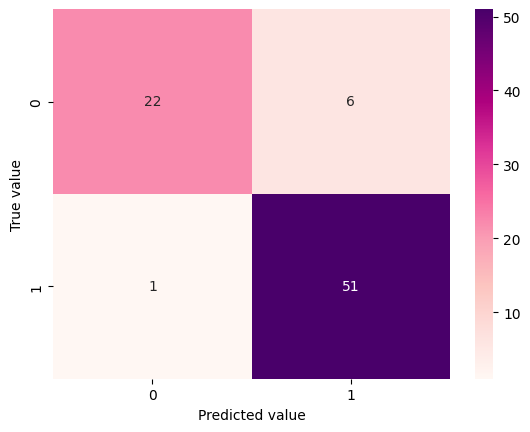

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['not_ckd', 'ckd']))

confmat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confmat, cmap="RdPu", annot=True)
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.show()

## XGB

In [ ]:
# XGBoost
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3,4,5,6,7]
learning_rate =[round(float(x),2) for x in np.linspace(start=0.01, stop=0.2, num=10)]
xgb_model = xgb.XGBClassifier(random_state=42)
param_grid = {'n_estimators': n_estimators,
        'max_depth': max_depth,
        'learning_rate': learning_rate}
#GSCV = GridSearchCV(xgb_model, param_grid=param_grid, cv=5)
#GSCV.fit(X_train, y_train)

xgb_model = xgb.XGBClassifier(n_estimators=50, max_depth=3, learning_rate=0.14, random_state=42)
xgb_model.fit(X_train, y_train)

y_train_pred = xgb_model.predict(X_train)
y_pred = xgb_model.predict(X_test)

print('Training accuracy:', xgb_model.score(X=X_train, y=y_train))
print('Testing accuracy:', xgb_model.score(X=X_test, y=y_test))
#print('The best model param:', GSCV.best_params_)

Training accuracy: 1.0
Testing accuracy: 0.9625


              precision    recall  f1-score   support

     not_ckd       1.00      0.89      0.94        28
         ckd       0.95      1.00      0.97        52

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



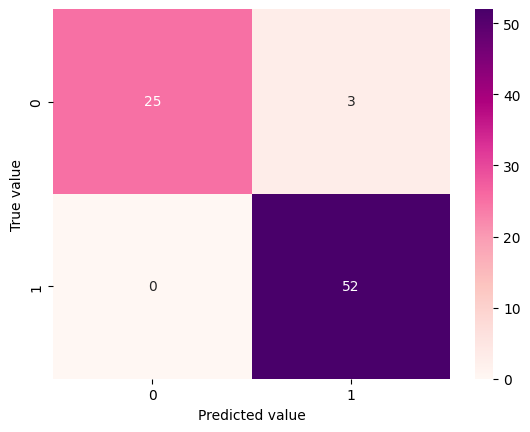

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['not_ckd', 'ckd']))

confmat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confmat, cmap="RdPu", annot=True)
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

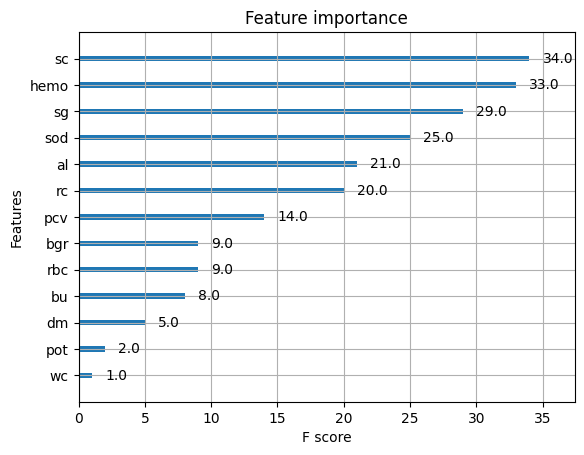

In [ ]:
# Tree based feature importance
from xgboost import plot_importance
plot_importance(xgb_model)

In [ ]:
importance = xgb_model.feature_importances_
indices = importance.argsort()[::-1] # descending sort
top_features = X_train.columns[indices][:7] # choose top 7 features to train

X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

In [ ]:
# Rebuilding xgb
from sklearn.model_selection import GridSearchCV
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3,4,5,6,7]
learning_rate =[round(float(x),2) for x in np.linspace(start=0.01, stop=0.2, num=10)]
xgb_model = xgb.XGBClassifier(random_state=42)
param_grid = {'n_estimators': n_estimators,
        'max_depth': max_depth,
        'learning_rate': learning_rate}
#GSCV = GridSearchCV(xgb_model, param_grid=param_grid, cv=5)
#GSCV.fit(X_train_selected, y_train)

xgb_model = xgb.XGBClassifier(n_estimators=10, max_depth=3, learning_rate=0.01, random_state=42)
xgb_model.fit(X_train_selected, y_train)

y_train_pred = xgb_model.predict(X_train_selected)
y_pred = xgb_model.predict(X_test_selected)

print('Training accuracy:', xgb_model.score(X=X_train_selected, y=y_train))
print('Testing accuracy:', xgb_model.score(X=X_test_selected, y=y_test))
#print('The best model param:', GSCV.best_params_)

Training accuracy: 0.98125
Testing accuracy: 0.975


              precision    recall  f1-score   support

     not_ckd       0.96      0.96      0.96        28
         ckd       0.98      0.98      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



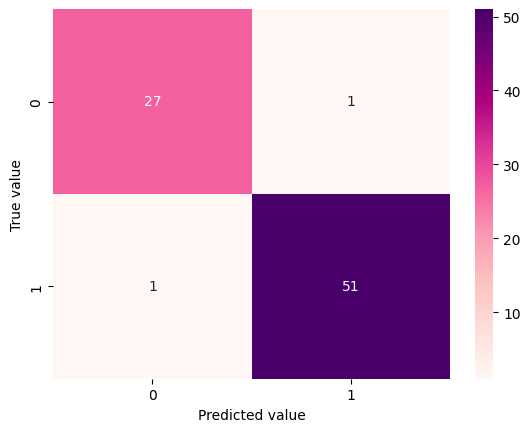

In [ ]:
print(classification_report(y_test, y_pred, target_names=['not_ckd', 'ckd']))

confmat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confmat, cmap="RdPu", annot=True)
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.show()

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    algorithm='SAMME.R',
    learning_rate = 0.5
)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
print('Training accuracy:', ada_clf.score(X=X_train, y=y_train))
print('Testing accuracy:', ada_clf.score(X=X_test, y=y_test))

Training accuracy: 1.0
Testing accuracy: 0.9625


              precision    recall  f1-score   support

     not_ckd       1.00      0.89      0.94        28
         ckd       0.95      1.00      0.97        52

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



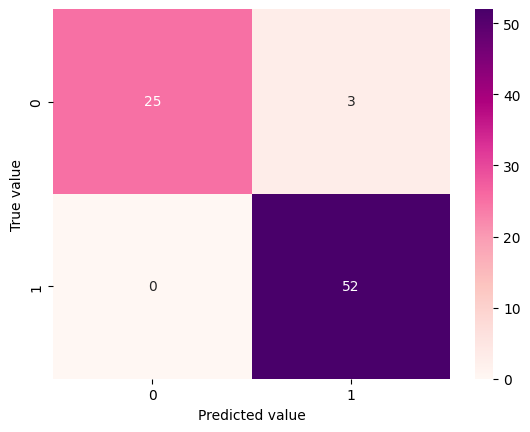

In [ ]:
print(classification_report(y_test, y_pred, target_names=['not_ckd', 'ckd']))

confmat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confmat, cmap="RdPu", annot=True)
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.show()

In [ ]:
# Select top 6 features
ada_clf.fit(X_train_selected, y_train)
prediction = ada_clf.predict(X_test_selected)
print('Training accuracy:', ada_clf.score(X=X_train_selected, y=y_train))
print('Testing accuracy:', ada_clf.score(X=X_test_selected, y=y_test))

Training accuracy: 1.0
Testing accuracy: 1.0
